In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib
import os

In [2]:

def load_nifti_data(file_path):
    """Load NIfTI file and return the data and associated metadata."""
    nifti = nib.load(file_path)
    return nifti.get_fdata(), nifti.affine, nifti.header

def main():
    # Base directory of the original files
    U01_UDEL_0061_01_MRE_AP_50Hz = '/Users/sobhn/Downloads/data_NITRC-multi-file-downloads/data/U01_UDEL_v4d-Part07/U01_UDEL_0061_01_v4/U01_UDEL_0061_01_MRE_AP_50Hz/'
    
    # Local root for saving the output files
    local_root = "."
    
    # Input files
    real_file = U01_UDEL_0061_01_MRE_AP_50Hz + "U01_UDEL_0061_01_MRE_AP_50Hz_disp_re.nii.gz"
    imag_file = U01_UDEL_0061_01_MRE_AP_50Hz + "U01_UDEL_0061_01_MRE_AP_50Hz_disp_im.nii.gz"
    # Load data

    print(real_file)
    print(imag_file)
    real_data, affine, header = load_nifti_data(real_file)
    imag_data, _, _           = load_nifti_data(imag_file)

    print(real_data.shape, imag_data.shape)
    

if __name__ == "__main__":
    main()


/Users/sobhn/Downloads/data_NITRC-multi-file-downloads/data/U01_UDEL_v4d-Part07/U01_UDEL_0061_01_v4/U01_UDEL_0061_01_MRE_AP_50Hz/U01_UDEL_0061_01_MRE_AP_50Hz_disp_re.nii.gz
/Users/sobhn/Downloads/data_NITRC-multi-file-downloads/data/U01_UDEL_v4d-Part07/U01_UDEL_0061_01_v4/U01_UDEL_0061_01_MRE_AP_50Hz/U01_UDEL_0061_01_MRE_AP_50Hz_disp_im.nii.gz
(160, 160, 80, 3) (160, 160, 80, 3)


In [3]:
import nibabel as nib

def get_nifti_metadata(nifti_file_path):
    """
    Extract metadata from a NIfTI file, including total physical dimensions in X, Y, Z.

    Parameters:
    - nifti_file_path: str, path to the NIfTI (.nii or .nii.gz) file.

    Returns:
    - metadata: dict, a dictionary containing relevant NIfTI metadata.
    """
    # Load the NIfTI image
    img = nib.load(nifti_file_path)
    
    # Extract header information
    header = img.header
    
    # Get shape and voxel size
    shape = header.get_data_shape()
    voxel_size = header.get_zooms()
    
    # Calculate total physical size (X, Y, Z) in mm
    total_x = shape[0] * voxel_size[0]  # X dimension in mm
    total_y = shape[1] * voxel_size[1]  # Y dimension in mm
    total_z = shape[2] * voxel_size[2]  # Z dimension in mm
    
    # Collect metadata into a dictionary
    metadata = {
        "Dimensions (Shape)": shape,  # Shape of the data (X, Y, Z, T)
        "Voxel Size (mm)": voxel_size,  # Voxel size (spacing)
        "Total Dimensions (mm)": (total_x, total_y, total_z),  # Total size in mm
        "Affine Transformation Matrix": img.affine,  # Affine matrix
        "Data Type": header.get_data_dtype(),  # Data type (e.g., int16, float32)
        "Slicing Orientation (qform_code)": header.get('qform_code'),  # Orientation code
        "Intent Name": header.get('intent_name'),  # Intent name, if available
        "Intent Code": header.get('intent_code'),  # Intent code
        "Voxel Dimensions (xyz)": header.get_xyzt_units(),  # Units for the dimensions
        "Data Dimensionality": header.get_data_dtype(),  # 3D or 4D, etc.
    }

    # Return metadata as a dictionary
    return metadata

# Example usage:
nifti_file = "U01_UDEL_v4d-Part07/U01_UDEL_0061_01_v4/U01_UDEL_0061_01_MRE_AP_50Hz/U01_UDEL_0061_01_MRE_AP_50Hz_disp_complex.nii.gz"  # Replace with your file path
metadata = get_nifti_metadata(nifti_file)
for key, value in metadata.items():
    print(f"{key}: {value}")


Dimensions (Shape): (160, 160, 80, 3)
Voxel Size (mm): (1.5, 1.5, 1.5, 0.0)
Total Dimensions (mm): (240.0, 240.0, 120.0)
Affine Transformation Matrix: [[-1.5  0.   0.  -1.5]
 [ 0.  -1.5  0.  -1.5]
 [ 0.   0.   1.5  1.5]
 [ 0.   0.   0.   1. ]]
Data Type: complex64
Slicing Orientation (qform_code): 2
Intent Name: b''
Intent Code: 0
Voxel Dimensions (xyz): ('mm', 'sec')
Data Dimensionality: complex64


In [16]:
U01_UDEL_0061_01_MRE_AP_50Hz = '/Users/sobhn/Downloads/data_NITRC-multi-file-downloads/data/U01_UDEL_v4d-Part07/U01_UDEL_0061_01_v4/U01_UDEL_0061_01_MRE_AP_50Hz/'
real_file = U01_UDEL_0061_01_MRE_AP_50Hz + "U01_UDEL_0061_01_MRE_AP_50Hz_disp_re.nii.gz"

real_disp = nib.load(real_file)
real_disp_array = real_disp.get_fdata()
print(real_disp_array.dtype)

float64


In [14]:
get_nifti_metadata(real_file)

{'Dimensions (Shape)': (160, 160, 80, 3),
 'Voxel Size (mm)': (1.5, 1.5, 1.5, 0.0),
 'Total Dimensions (mm)': (240.0, 240.0, 120.0),
 'Affine Transformation Matrix': array([[-1.5,  0. ,  0. , -1.5],
        [ 0. , -1.5,  0. , -1.5],
        [ 0. ,  0. ,  1.5,  1.5],
        [ 0. ,  0. ,  0. ,  1. ]]),
 'Data Type': dtype('<f4'),
 'Slicing Orientation (qform_code)': array(2, dtype=int16),
 'Intent Name': array(b'', dtype='|S16'),
 'Intent Code': array(0, dtype=int16),
 'Voxel Dimensions (xyz)': ('mm', 'sec'),
 'Data Dimensionality': dtype('<f4')}

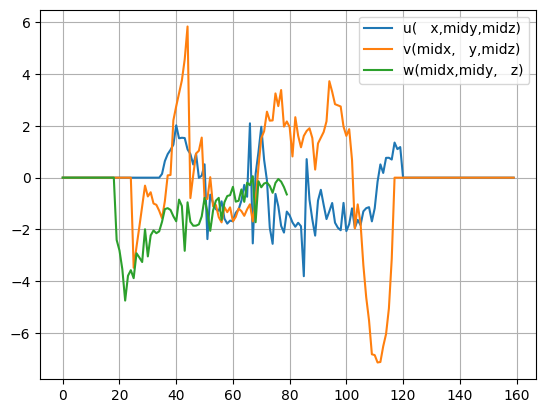

In [24]:
plt.plot( real_disp_array[ :,60,40,0] , label='u(   x,midy,midz)')
plt.plot( real_disp_array[60, :,40,0] , label='v(midx,   y,midz)')
plt.plot( real_disp_array[60,60, :,0] , label='w(midx,midy,   z)')
plt.grid()
plt.legend()

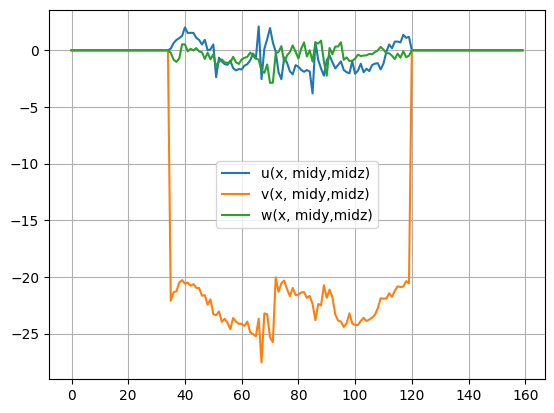

In [25]:
plt.plot( real_disp_array[ :,60,40,0] , label='u(x, midy,midz)')
plt.plot( real_disp_array[ :,60,40,1] , label='v(x, midy,midz)')
plt.plot( real_disp_array[ :,60,40,2] , label='w(x, midy,midz)')
plt.grid()
plt.legend()

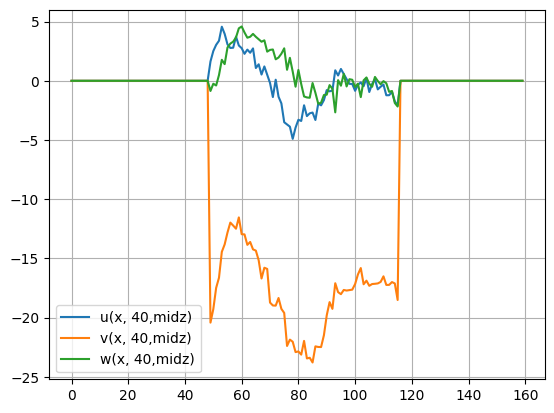

In [26]:
plt.plot( real_disp_array[ :,40,40,0] , label='u(x, 40,midz)')
plt.plot( real_disp_array[ :,40,40,1] , label='v(x, 40,midz)')
plt.plot( real_disp_array[ :,40,40,2] , label='w(x, 40,midz)')
plt.grid()
plt.legend()

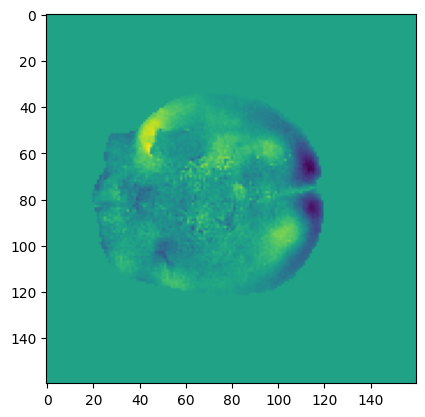

In [30]:
plt.imshow( real_disp_array[ :,:,40,0] )

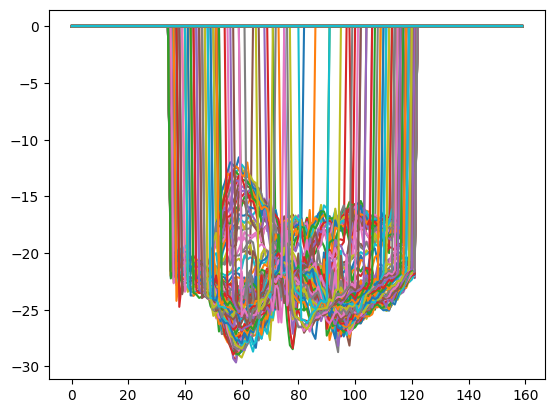

In [34]:
plt.plot( real_disp_array[ :,:,40,1] , label='v(x, 40,midz)');
